Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               8

batch 0batch 1batch 2batch 3batch 4batch 5batch 6batch 7batch 8batch 9batch 10batch 11batch 12batch 13batch 14batch 15batch 16batch 17batch 18batch 19batch 20batch 21batch 22batch 23batch 24batch 25batch 26batch 27batch 28batch 29batch 30batch 31batch 32batch 33batch 34batch 35batch 36batch 37batch 38batch 39batch 40batch 41batch 42batch 43batch 44batch 45batch 46batch 47batch 48batch 49batch 50batch 51batch 52batch 53batch 54batch 55batch 56batch 57batch 58batch 59batch 60batch 61batch 62batch 63batch 64batch 65batch 66batch 67batch 68batch 69batch 70batch 71batch 72batch 73batch 74batch 75batch 76batch 77batch 78batch 79batch 80batch 81batch 82batch 83batch 84batch 85batch 86batch 87batch 88batch 89batch 90batch 91batch 92batch 93batch 94batch 95batch 96batch 97batch 98batch 99batch 100batch 101batch 102batch 103batch 104batch 105batch 106batch 107batch 108batch 109batch 110batch 111batch 112batch 113batch 114batch 115batch 116batch 117batch 118batch 119batch 120batch 121batch 122bat

KeyboardInterrupt: 

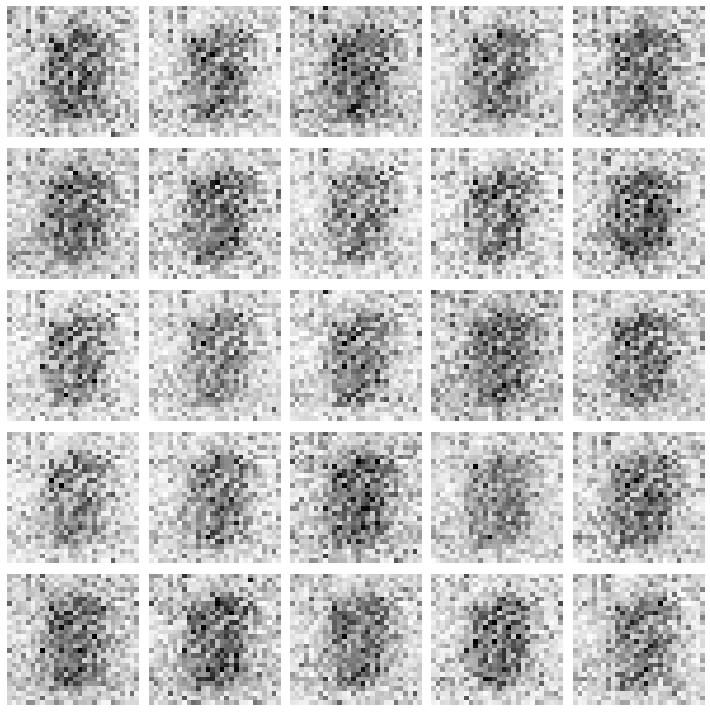

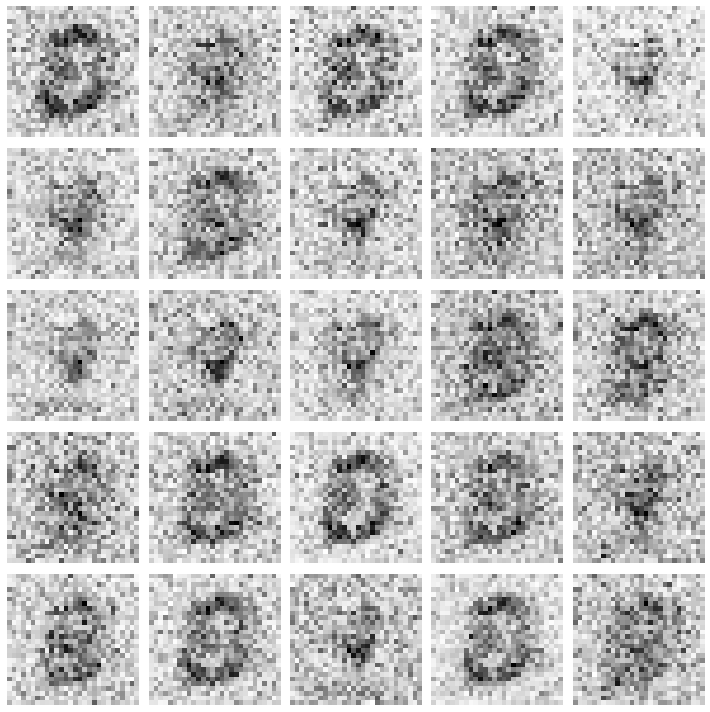

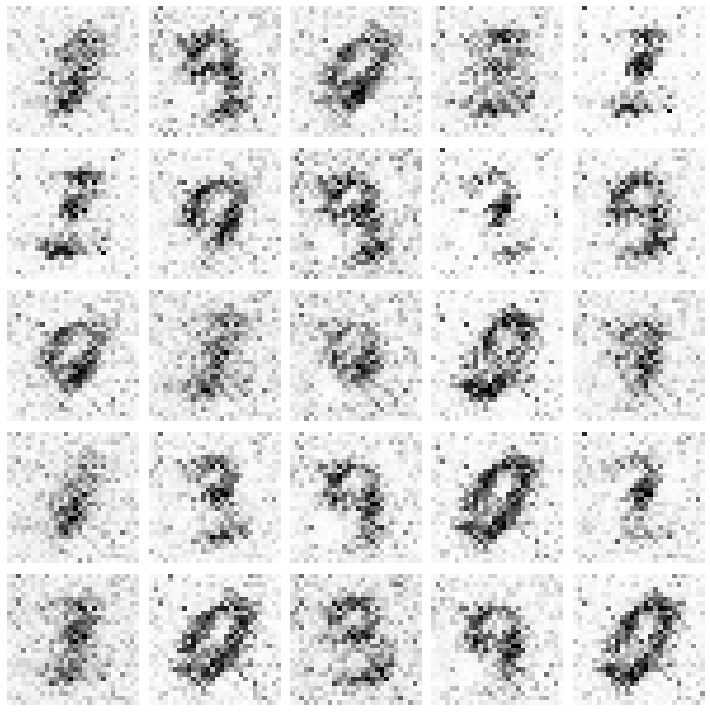

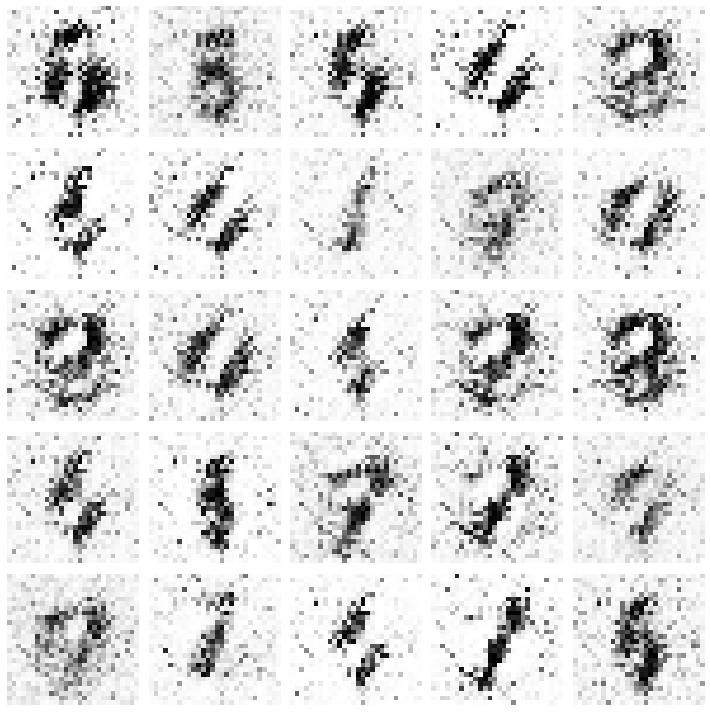

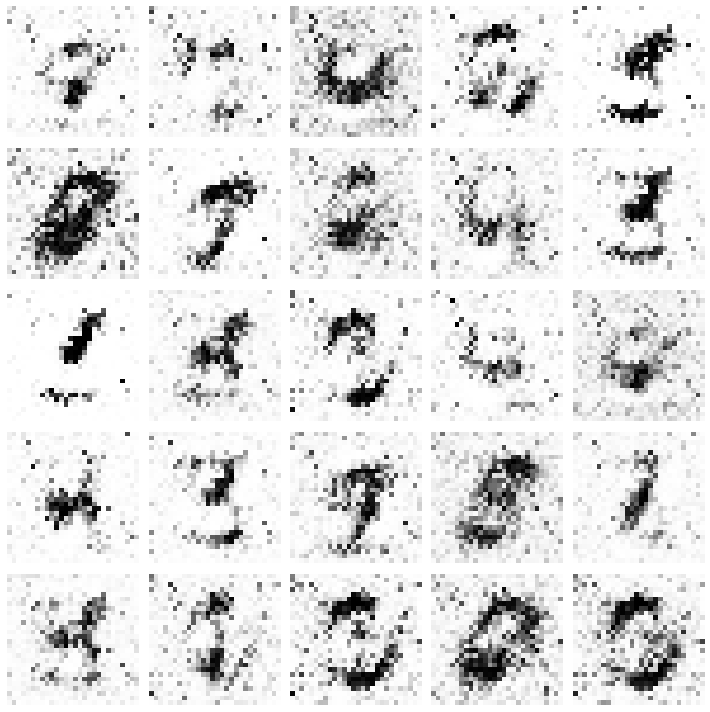

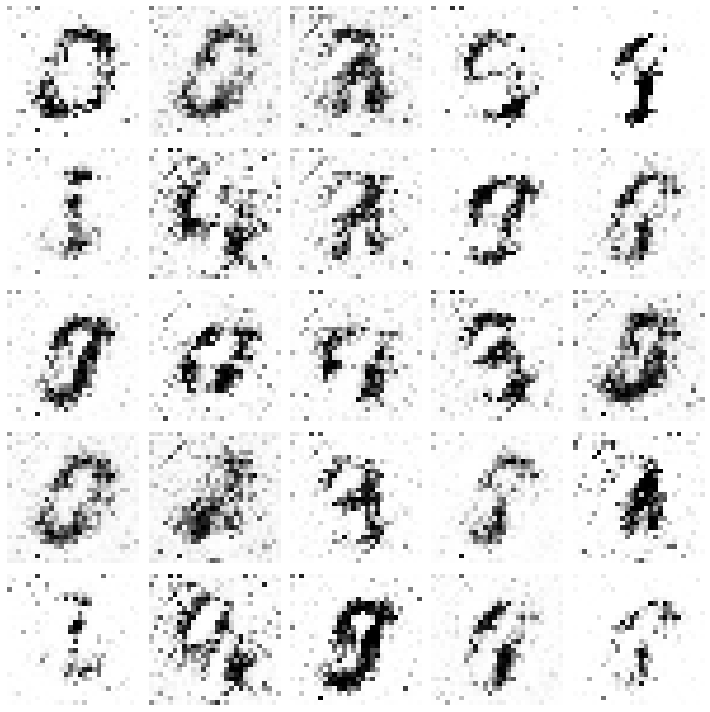

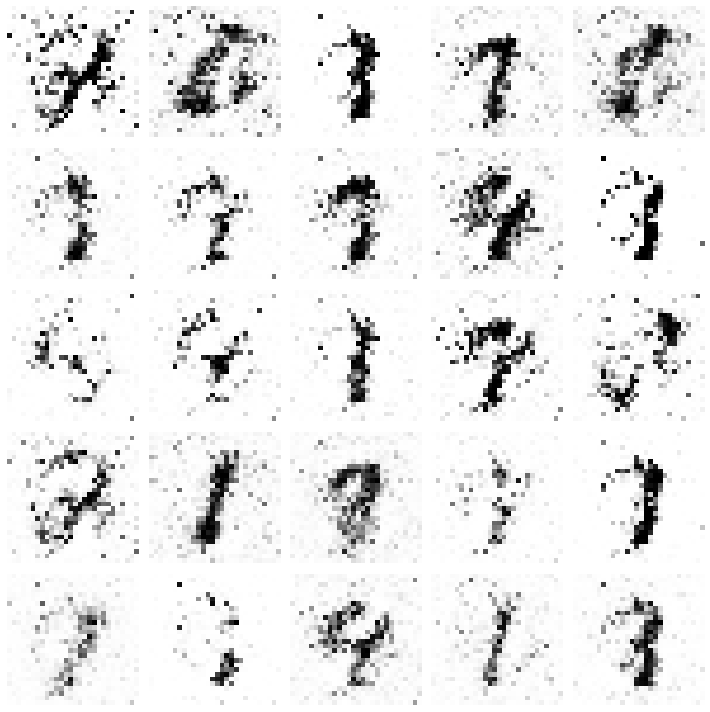

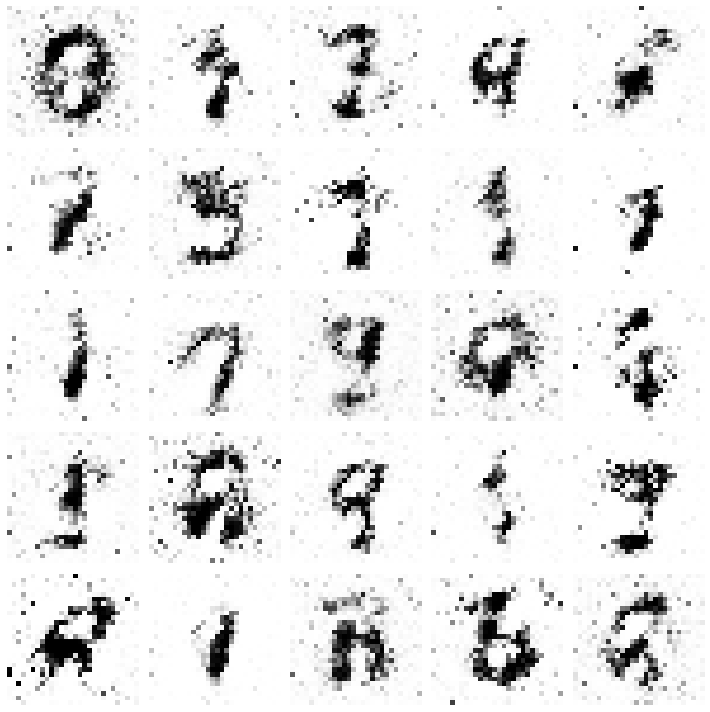

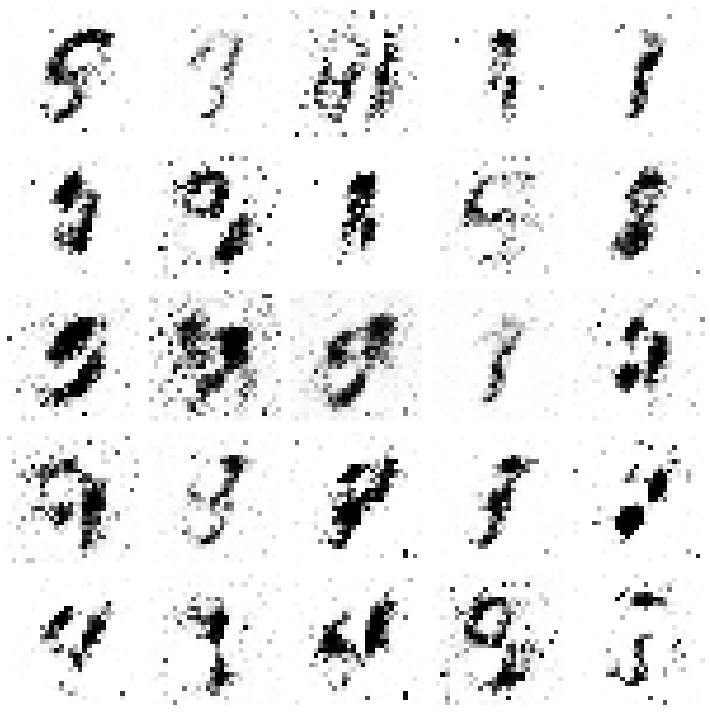

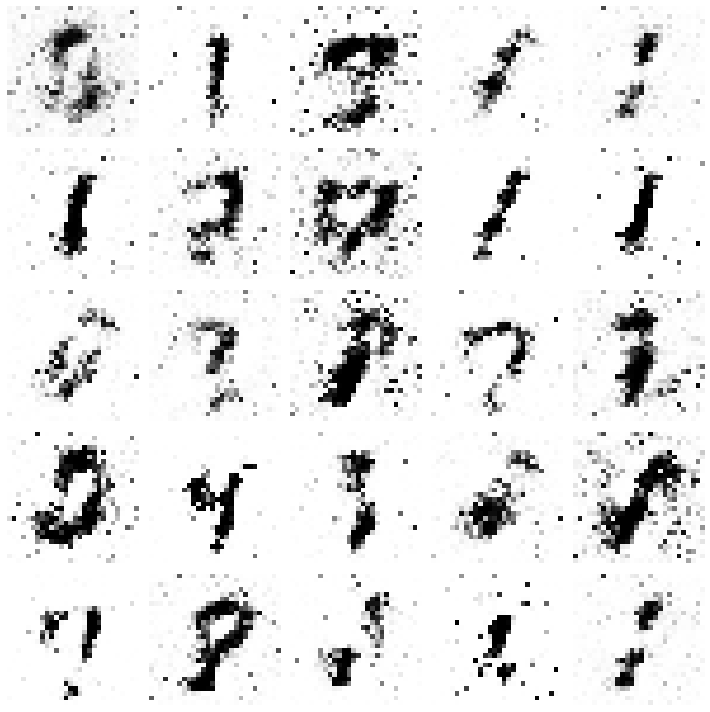

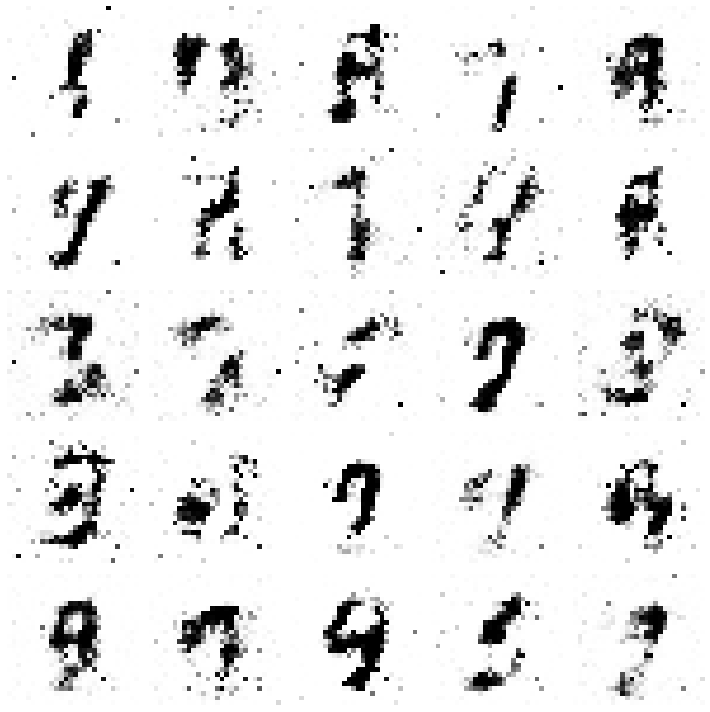

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tqdm import tqdm

#把資料庫裡的資料load進來
def load_data():
    (x_train,y_train),(_,_) = mnist.load_data()
    x_train = (x_train.astype(np.float32)-127.5)/127.5
    x_train = x_train.reshape(60000,784)
    return (x_train,y_train)

#創造類神經網路
def build_generator():
    model = Sequential()
    model.add(Dense(units=256,input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(units=512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(units=1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(units=784,activation='tanh'))
    model.compile(loss='binary_crossentropy',optimizer=Adam(0.0002,0.5))
    return model

def build_discriminator():
    model = Sequential()
    model.add(Dense(units=1024,input_dim=784))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3)) #防止過度擬合
    model.add(Dense(units=512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(units=256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=Adam(0.0002,0.5))
    return model

def build_GAN(discriminator,generator):
    discriminator.trainable = False
    GAN_input = Input(shape = (100,))
    x = generator(GAN_input)
    GAN_output = discriminator(x)
    GAN = Model(inputs = GAN_input,outputs = GAN_output)
    GAN.compile(loss = 'binary_crossentropy',optimizer=Adam(0.0002,0.5))
    return GAN

def save_image(generator,epoch,example=25,dim=(5,5),figsize=(10,10)):
    noise = np.random.normal(loc=0,scale=1,size=[example,100])
    generator_images = generator.predict(noise)
    generator_images = generator_images.reshape(25,28,28)
    plt.figure(figsize=figsize)
    for i in range(generator_images.shape[0]):
        plt.subplot(dim[0],dim[1],i+1)
        plt.imshow(generator_images[i],interpolation='nearest',cmap='Greys')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('GAN_images %d,.png'%epoch)
    

(x_train,y_train) = load_data()
generator = build_generator()
generator.summary()
discriminator = build_discriminator()
discriminator.summary()
GAN = build_GAN(discriminator,generator)
GAN.summary()

batch_size = 128
for i in range(1,801):
    print("Epoch %d",i)
    for j in range(0,batch_size):
        noise = np.random.normal(0,1,(batch_size,100))
        fake_image = generator.predict(noise)
        real_image = x_train[np.random.randint(0,x_train.shape[0],batch_size)]
        label_fake = np.zeros(batch_size)
        label_real = np.ones(batch_size)
        x = np.concatenate([fake_image,real_image])
        y = np.concatenate([label_fake,label_real])
        
        discriminator.trainable = True
        discriminator.train_on_batch(x,y)
        discriminator.trainable = False
        GAN.train_on_batch(noise,label_real)
        
        print('batch',j,end='')
    save_image(generator,i)